In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

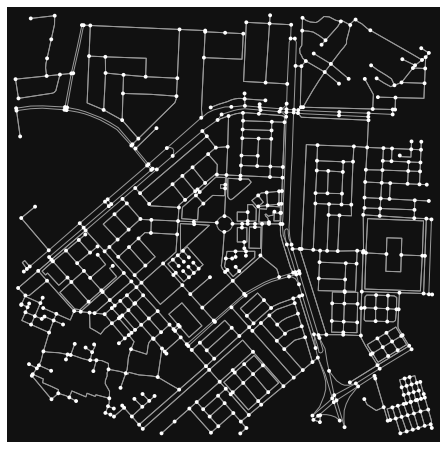

In [70]:
location_point = (28.59616668225275, 77.36918758619207)
G = ox.graph_from_point(location_point, dist=1000, simplify=True)
fig, ax = ox.plot_graph(G, show=False, close=False)

In [75]:
# use networkx to calculate the shortest path between two nodes
origin_node = list(G.nodes())[-100]
destination_node = list(G.nodes())[233]
station_1 = list(G.nodes())[52]
station_2 = list(G.nodes())[-70]
station_3 = list(G.nodes())[44]
circle_1 = list(G.nodes())[-46]
circle_2 = list(G.nodes())[67]
circle_3 = list(G.nodes())[-146]

In [76]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

y          x      osmid                   geometry
283639824  28.601078  77.372281  283639824  POINT (77.37228 28.60108)
307369586  28.598667  77.365472  307369586  POINT (77.36547 28.59867)
307369628  28.598722  77.365538  307369628  POINT (77.36554 28.59872)
307369643  28.601057  77.361433  307369643  POINT (77.36143 28.60106)
799342199  28.600952  77.372277  799342199  POINT (77.37228 28.60095)

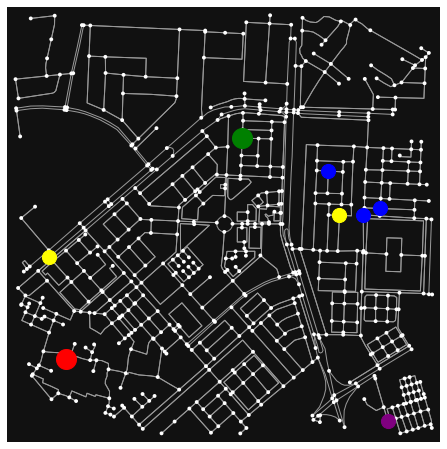

In [100]:
fig, ax = ox.plot_graph(G, show=False, close=False)
ax.scatter(nodes.x[origin_node], nodes.y[origin_node], c='red', s=400)
ax.scatter(nodes.x[destination_node], nodes.y[destination_node], c='green', s=400)
ax.scatter(nodes.x[station_1], nodes.y[station_1], c='blue', s=200)
ax.scatter(nodes.x[station_2], nodes.y[station_2], c='blue', s=200)
ax.scatter(nodes.x[station_3], nodes.y[station_3], c='blue', s=200)
ax.scatter(nodes.x[circle_1], nodes.y[circle_1], c='yellow', s=200)
ax.scatter(nodes.x[circle_2], nodes.y[circle_2], c='yellow', s=200)
ax.scatter(nodes.x[circle_3], nodes.y[circle_3], c='purple', s=200)


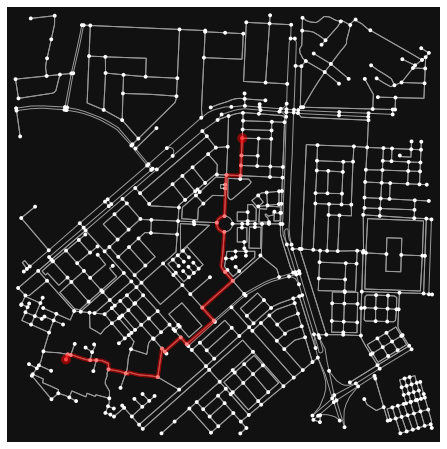

In [78]:
route = nx.shortest_path(G, origin_node, destination_node)
route_map,ax = ox.plot_graph_route(G, route)

In [79]:
len(route)

24

In [80]:
considered_routes = nx.all_simple_paths(G, origin_node, destination_node, cutoff=30)

In [81]:
# import numpy as np
considered_routes = list(considered_routes)

In [82]:
len(considered_routes)

8807

In [92]:
peripheries = [
    nx.dijkstra_path(G, origin_node, station_1),
    nx.dijkstra_path(G, origin_node, station_2),
    nx.dijkstra_path(G, origin_node, station_3),
    nx.dijkstra_path(G, origin_node, circle_1),
    nx.dijkstra_path(G, origin_node, circle_2),
    #nx.dijkstra_path(G, origin_node, circle_3),
]

In [93]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

In [94]:
from collections import Counter

route_scores = []

for i in considered_routes:
    total_sim = 0
    for j in peripheries:
        counterA = Counter(i)
        counterB = Counter(j)
        total_sim += counter_cosine_similarity(counterA, counterB)
    route_scores.append([total_sim, i])

In [95]:
import pandas as pd
df = pd.DataFrame(route_scores, columns=['total','route'])

In [117]:
len(df.route)

8807

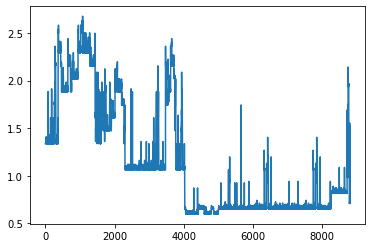

In [122]:
plt.plot([i for i in range(len(df))], df.total)

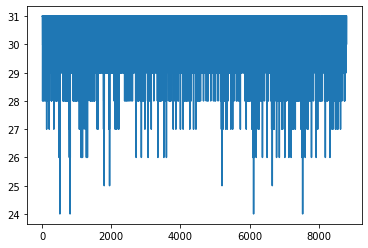

In [123]:
plt.plot([i for i in range(len(df))], [len(df.route[i]) for i in range(len(df))])

In [97]:
high = max(df.total)
for i in range(len(df)):
    if df.total[i] == high:
        chosen_route = df.route[i]

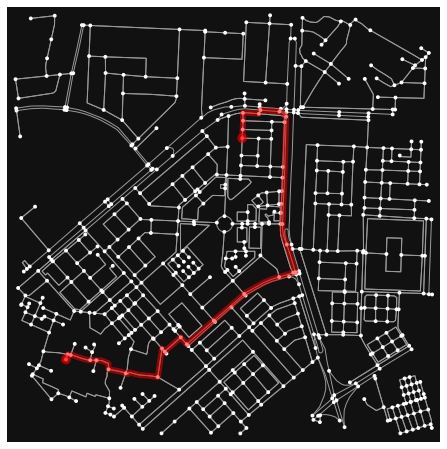

In [98]:
fig, ax = ox.plot_graph_route(G, chosen_route, route_linewidth=6)

In [38]:
# A stack based function to reverse a string 
def reverse(string): 
	n = len(string) 
	
	# Create a empty stack 
	stacker=[] 

	# Push all characters of string to stack 
	for i in range(n): 
		stacker.append(string[i])

	# Making the string empty since all 
	# characters are saved in stack	 
	string="" 

	# Pop all characters of string and put 
	# them back to string 
	for i in range(n): 
		string+= stacker.pop() 
		
	return string 

# Driver code 
s = input("Enter the String to Be Reverse: ")
print ("The reversed string(using stack) is : ",end="") 
print (reverse(s)) 
s = input("Enter the String to Be Reverse: ")
print ("The reversed string(using stack) is : ",end="") 
print (reverse(s)) 


The reversed string(using stack) is : anilegnA
The reversed string(using stack) is : hdurinA
